<a href="https://colab.research.google.com/github/musman2012/ml-data_science/blob/master/SOH_Prediction/Phase_II_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase-II
This phase would have the following keys steps to perform:
* Apply labelling/binning on the data (yet to decided the technique)
* Make three clusters/subsets of the data on the basis of cycle variable
* Apply Association Rule Mining on the subsets
* Apply prediction technique to classify the target variable soh
* Evaluate Models Results

More explanation for the process and what I want to acheive 

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import platform
import dill
dill.load_session('phase-II-ml.db')

In [3]:
'''
authored by Muhammad Usman (musman14@student.bradford.ac.uk)

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

FILE_PATH = "batteries_processed.csv"
bat_data = pd.read_csv(FILE_PATH, error_bad_lines = False)    # reading the data from csv file

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Removing the same features which were removed in Phase-I as well

In [10]:
filtered_data = bat_data.copy()
columns_to_drop = ['id', 'vin', 'vin_prefix', 'record_id','recorded_time', 'actual_time', 'arrival_time', 'powermode', 'mheader_vin', 'mheader_time', 'mheader_type', 'message','cat4', 'cat6', 'cat7', 'inlet_coolant_temp','cooling_energy_used', 'max_soh_cell', 'power_soh', 'min_soh', 'max_soh', 'min_soh_cell_id','imbalance_percent', 'parkingdata_hvbattavgsocoatevent', 'parkingdata_hvbattavtempatevent']
filtered_data = filtered_data.drop(columns=columns_to_drop)
filtered_data.head()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,soh,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,10619,6.5,0.0,22,noBalancing,4.107,12,0.675,4.153,0.046,445,15,22,96,14,1,870,135,activeHeating,195,98.0,0,storage,1,False,0
1,9531,4.0,0.0,22,noBalancing,3.983,6,7.375,4.008,0.025,432,16,36,21,7,1,870,90,idle,55,98.0,0,storage,1,False,-1088
2,9531,4.0,0.0,22,noBalancing,3.989,6,7.600,4.023,0.034,431,16,36,76,7,1,870,90,idle,55,98.0,0,storage,1,False,0
3,9531,4.0,0.0,22,noBalancing,3.984,6,6.850,4.020,0.036,431,16,36,79,7,1,870,90,idle,55,98.0,0,storage,1,False,0
4,9531,4.0,0.0,22,noBalancing,3.980,6,7.000,4.015,0.035,431,16,36,85,7,1,870,90,idle,55,98.0,0,storage,1,False,0


In [9]:
print(filtered_data.nunique() > 4)

odometer                   True
ambient_temp               True
vehicle_speed              True
balancing_trigger_cell     True
balancing_status          False
min_voltage                True
min_temp                   True
traction_current           True
max_voltage                True
imbalance                  True
traction_voltage           True
min_temp_cell              True
min_voltage_cell           True
max_voltage_cell           True
max_temp                   True
max_temp_cell              True
fuse_temp                 False
emodule_temp               True
thermal_manager_mode       True
outlet_coolant_temp        True
soh                        True
fast_charge_count          True
cycle                     False
num_cycle                  True
fast_charge               False
trip_distance              True
dtype: bool


### Binning the data (Stuck Here So Far)
We have to choices for Binning the data here:
* Fixed-Width Binning: Specific fixed widths for each of the bins which are usually pre-defined
* Adaptive Binning: Such binning in which we use the data distribution itself to decide bin ranges

&rightarrow; Quantile Binning is one of the type of Adaptive Binning which helps in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. We will use this binning to convert out continuous variables into categorical variables.

Following function converts the continuous data into categorical data in such a way that distribution is based on the mean values. That is:

*   Category 1 (Low): Minimum Value - Mean/2
*   Category 2 (Medium): Mean/2 - Mean
*   Category 3 (High): Maximum Value - Mean/2
*   Category 4 (Very High): Upto Maximum Value



In [11]:
int_cols = filtered_data.select_dtypes('int64') ## finding all the continuous variables
float_cols = filtered_data.select_dtypes('float')
int_cols = int_cols.loc[:, int_cols.nunique() > 4]
float_cols = float_cols.loc[:, float_cols.nunique() > 4]
for col in int_cols.columns:
  filtered_data[col] = pd.qcut(filtered_data[col], duplicates='drop', q=5)
for col in float_cols.columns:
  filtered_data[col] = pd.qcut(filtered_data[col], duplicates='drop', q=5)
filtered_data.head()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,soh,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,"(9028.0, 142256.0]","(5.25, 8.0]","(-0.001, 200.13]","(-0.001, 22.0]",noBalancing,"(4.043, 4.155]","(10.0, 12.0]","(0.3, 209715.2]","(4.068, 4.183]","(0.029, 1.141]","(438.0, 450.0]","(13.0, 30.0]","(18.0, 38.0]","(78.0, 108.0]","(13.0, 15.0]","(0.999, 4.0]",870,"(-150.001, 175.0]",activeHeating,"(150.0, 870.0]","(-0.001, 98.0]","(-0.001, 200.0]",storage,"(0.999, 4.0]",False,"(-52788.001, 0.0]"
1,"(9028.0, 142256.0]","(-128.001, 5.25]","(-0.001, 200.13]","(-0.001, 22.0]",noBalancing,"(3.945, 4.043]","(-40.001, 10.0]","(0.3, 209715.2]","(3.969, 4.068]","(0.02, 0.029]","(427.0, 438.0]","(13.0, 30.0]","(18.0, 38.0]","(16.0, 32.0]","(-40.001, 11.0]","(0.999, 4.0]",870,"(-150.001, 175.0]",idle,"(-160.001, 95.0]","(-0.001, 98.0]","(-0.001, 200.0]",storage,"(0.999, 4.0]",False,"(-52788.001, 0.0]"
2,"(9028.0, 142256.0]","(-128.001, 5.25]","(-0.001, 200.13]","(-0.001, 22.0]",noBalancing,"(3.945, 4.043]","(-40.001, 10.0]","(0.3, 209715.2]","(3.969, 4.068]","(0.029, 1.141]","(427.0, 438.0]","(13.0, 30.0]","(18.0, 38.0]","(52.0, 78.0]","(-40.001, 11.0]","(0.999, 4.0]",870,"(-150.001, 175.0]",idle,"(-160.001, 95.0]","(-0.001, 98.0]","(-0.001, 200.0]",storage,"(0.999, 4.0]",False,"(-52788.001, 0.0]"
3,"(9028.0, 142256.0]","(-128.001, 5.25]","(-0.001, 200.13]","(-0.001, 22.0]",noBalancing,"(3.945, 4.043]","(-40.001, 10.0]","(0.3, 209715.2]","(3.969, 4.068]","(0.029, 1.141]","(427.0, 438.0]","(13.0, 30.0]","(18.0, 38.0]","(78.0, 108.0]","(-40.001, 11.0]","(0.999, 4.0]",870,"(-150.001, 175.0]",idle,"(-160.001, 95.0]","(-0.001, 98.0]","(-0.001, 200.0]",storage,"(0.999, 4.0]",False,"(-52788.001, 0.0]"
4,"(9028.0, 142256.0]","(-128.001, 5.25]","(-0.001, 200.13]","(-0.001, 22.0]",noBalancing,"(3.945, 4.043]","(-40.001, 10.0]","(0.3, 209715.2]","(3.969, 4.068]","(0.029, 1.141]","(427.0, 438.0]","(13.0, 30.0]","(18.0, 38.0]","(78.0, 108.0]","(-40.001, 11.0]","(0.999, 4.0]",870,"(-150.001, 175.0]",idle,"(-160.001, 95.0]","(-0.001, 98.0]","(-0.001, 200.0]",storage,"(0.999, 4.0]",False,"(-52788.001, 0.0]"


In [14]:
for c in filtered_data.columns:
  print("Column", c)
  print(filtered_data[c].value_counts(normalize='true'))

Column odometer
(2204.0, 4423.0]      0.200063
(-0.001, 2204.0]      0.200027
(4423.0, 6424.0]      0.199977
(6424.0, 9028.0]      0.199970
(9028.0, 142256.0]    0.199964
Name: odometer, dtype: float64
Column ambient_temp
(9.75, 12.25]       0.215842
(-128.001, 5.25]    0.207938
(5.25, 8.0]         0.202360
(8.0, 9.75]         0.192675
(12.25, 46.5]       0.181185
Name: ambient_temp, dtype: float64
Column vehicle_speed
(-0.001, 200.13]    1.0
Name: vehicle_speed, dtype: float64
Column balancing_trigger_cell
(-0.001, 22.0]    0.215226
(65.0, 85.0]      0.203931
(43.0, 65.0]      0.200545
(85.0, 108.0]     0.194523
(22.0, 43.0]      0.185775
Name: balancing_trigger_cell, dtype: float64
Column balancing_status
noBalancing         0.714526
passiveBalancing    0.285253
initialValue        0.000221
Name: balancing_status, dtype: float64
Column min_voltage
(-0.001, 3.7]     0.200664
(3.839, 3.945]    0.200490
(3.7, 3.839]      0.200444
(4.043, 4.155]    0.199514
(3.945, 4.043]    0.198888
Nam

In [0]:
def categorize_data(cont_data):

  for col in float_cols.columns:
      global filtered_data
      col_max = filtered_data[col].max()
      col_min = filtered_data[col].min()
      col_mean = filtered_data[col].mean()
      range1 = col_min + (col_mean/2)
      range2 = col_min + col_mean
      range3 = col_max - (col_mean/2)
      range4 = col_max
      counter = 0
      for val in filtered_data[col]:
        if val >= col_min and val <= range1:
          filtered_data.at[counter, col] = 1  # low
          #print("Replaced with 1")
        elif val >= range1 and val <= range2:
          filtered_data.at[counter, col] = 2  # medium
          #print("Replaced with 2")
        elif val >= range2 and val <= range3:
          filtered_data.at[counter, col] = 3  # high
          #print("Replaced with 3")
        else:
          filtered_data.at[counter, col] = 4  # very high
          #print("Replaced with 4")
        counter += 1 
#      return filtered_data

#  processes = []
#  for col in cont_data.columns:
#      p = multiprocessing.Process(target=categ_col, args=[col])
 #     p.start()
#      processes.append(p)
#  for process in processes:
 #     process.join()

#filtered_data.head()

In [18]:
#float_cols = filtered_data.select_dtypes('float')
int_cols = filtered_data.select_dtypes('int64') ## finding all the continuous variables
categorize_data(int_cols)
#categorize_data(int_cols)
filtered_data.head()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,soh,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
0,10619,2.0,1.0,22,noBalancing,2.0,12,2.0,2.0,2.0,445,15,22,96,14,1,870,135,activeHeating,195,1.0,0,storage,1,False,0
1,9531,2.0,1.0,22,noBalancing,2.0,6,2.0,2.0,2.0,432,16,36,21,7,1,870,90,idle,55,1.0,0,storage,1,False,-1088
2,9531,2.0,1.0,22,noBalancing,2.0,6,2.0,2.0,2.0,431,16,36,76,7,1,870,90,idle,55,1.0,0,storage,1,False,0
3,9531,2.0,1.0,22,noBalancing,2.0,6,2.0,2.0,2.0,431,16,36,79,7,1,870,90,idle,55,1.0,0,storage,1,False,0
4,9531,2.0,1.0,22,noBalancing,2.0,6,2.0,2.0,2.0,431,16,36,85,7,1,870,90,idle,55,1.0,0,storage,1,False,0


In [15]:
#from numba import jit, cuda 
int_cols.columns

Index(['odometer', 'balancing_trigger_cell', 'min_temp', 'traction_voltage',
       'min_temp_cell', 'min_voltage_cell', 'max_voltage_cell', 'max_temp',
       'max_temp_cell', 'fuse_temp', 'emodule_temp', 'outlet_coolant_temp',
       'fast_charge_count', 'num_cycle', 'trip_distance'],
      dtype='object')

In [0]:
del float_cols, int_cols

In [11]:
for col in filtered_data.columns:
  print(filtered_data[col].value_counts(normalize='true'))

6923     3.802000e-04
3297     3.316000e-04
2739     3.222000e-04
3296     3.138000e-04
703      3.076000e-04
             ...     
17205    2.000000e-07
20739    2.000000e-07
29491    2.000000e-07
23197    2.000000e-07
21109    2.000000e-07
Name: odometer, Length: 23959, dtype: float64
3.0    0.994175
1.0    0.005797
4.0    0.000028
Name: ambient_temp, dtype: float64
1.0    0.854018
3.0    0.140316
2.0    0.005665
4.0    0.000002
Name: vehicle_speed, dtype: float64
49     0.024991
76     0.024488
67     0.022002
4      0.021951
106    0.020071
         ...   
59     0.003774
14     0.003695
41     0.003465
23     0.003433
0      0.000139
Name: balancing_trigger_cell, Length: 109, dtype: float64
noBalancing         0.714526
passiveBalancing    0.285253
initialValue        0.000221
Name: balancing_status, dtype: float64
4.0    0.534483
2.0    0.465404
1.0    0.000113
Name: min_voltage, dtype: float64
14    1.344864e-01
13    1.343920e-01
12    9.560140e-02
15    8.956380e-02
11    7.649

### Creating subsets of the data on the basis of cycle variable

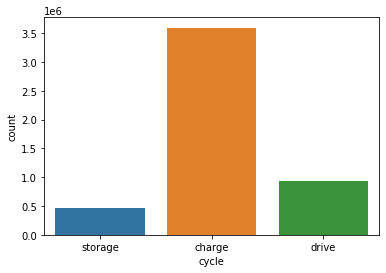

In [0]:
sns.countplot(filtered_data['cycle'])

In [24]:
bat_storage_data = filtered_data[bat_data['cycle'] == 'storage']
bat_charge_data = filtered_data[bat_data['cycle'] == 'charge']
bat_drive_data = filtered_data[bat_data['cycle'] == 'drive']
print("storage data dimensions are ", bat_storage_data.shape)
print("charge data dimensions are ", bat_charge_data.shape)
print("drive data dimensions are ", bat_drive_data.shape)

storage data dimensions are  (467495, 26)
charge data dimensions are  (3595456, 26)
drive data dimensions are  (937049, 26)


In [25]:
bat_charge_data.head()

,odometer,ambient_temp,vehicle_speed,balancing_trigger_cell,balancing_status,min_voltage,min_temp,traction_current,max_voltage,imbalance,traction_voltage,min_temp_cell,min_voltage_cell,max_voltage_cell,max_temp,max_temp_cell,fuse_temp,emodule_temp,thermal_manager_mode,outlet_coolant_temp,soh,fast_charge_count,cycle,num_cycle,fast_charge,trip_distance
11,3,2.0,1.0,1,noBalancing,1.0,9,1.0,1.0,1.0,414,4,22,21,10,1,870,190,activeHeating,85,1.0,0,charge,2,False,81
12,3,2.0,1.0,1,noBalancing,1.0,9,1.0,1.0,1.0,414,4,22,45,10,1,870,190,activeHeating,85,1.0,0,charge,2,False,0
13,3,2.0,1.0,1,noBalancing,1.0,9,1.0,1.0,1.0,414,4,22,45,10,1,870,190,activeHeating,85,1.0,0,charge,2,False,0
14,3,2.0,1.0,1,noBalancing,1.0,9,1.0,1.0,1.0,414,4,22,45,10,1,870,190,activeHeating,85,1.0,0,charge,2,False,0
15,3,2.0,1.0,1,noBalancing,1.0,9,1.0,1.0,1.0,414,4,22,20,10,1,870,190,activeHeating,85,1.0,0,charge,2,False,0


In [0]:
import dill
dill.dump_session('phase-II-ml.db')